In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()
import numpy as np
import sqlalchemy
%load_ext sql
engine=sqlalchemy.create_engine("postgresql://millbr02:@localhost/movies")

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
release_date=pd.read_sql("release_date",engine)
release_date.head()

,title,year,country,date,month,day,dow
0,Race to Witch Mountain,2009,Mexico,2009-03-27,3,27,4
1,Race to Witch Mountain,2009,South Africa,2009-03-27,3,27,4
2,Race to Witch Mountain,2009,Hong Kong,2009-04-02,4,2,3
3,Race to Witch Mountain,2009,Israel,2009-04-02,4,2,3
4,Race to Witch Mountain,2009,Sweden,2009-04-08,4,8,2


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [7]:
#release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,parse_dates=['date'], infer_datetime_format=True)
#release_dates.head()

### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

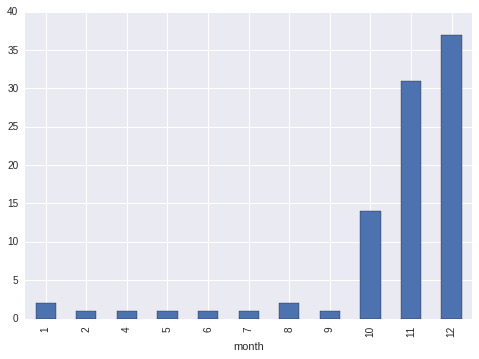

In [8]:
rd=release_date
rd[rd.title.str.contains('Christmas')&(rd.country=="USA")].groupby('month').size().plot(kind="bar")

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

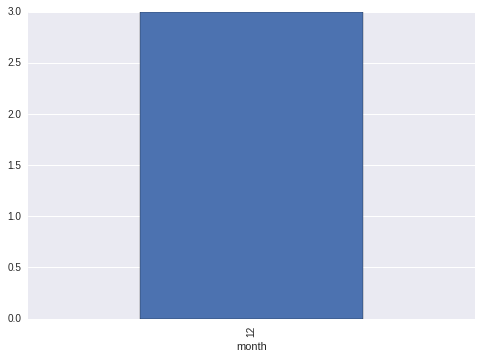

In [9]:
rd[rd.title.str.startswith('The Hobbit')&(rd.country=="USA")].groupby('month').size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

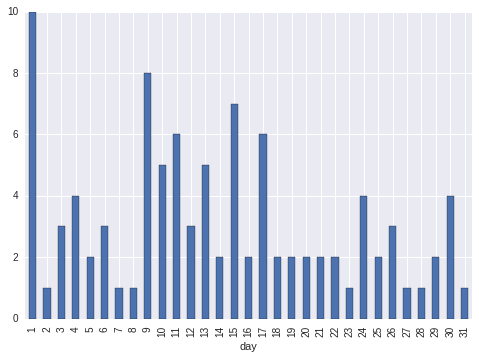

In [10]:
rd[rd.title.str.contains('Romance')&(rd.country=="USA")].groupby('day').size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

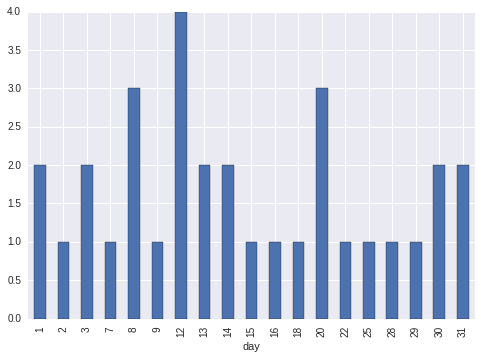

In [11]:
rd[rd.title.str.contains('Action')&(rd.country=="USA")].groupby('day').size().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [12]:
main=pd.merge(cast,rd,left_on=['title','year'],right_on=['title','year'])
main['decade']=main.year//10*10
main.head()

,title,year,name,type,character,n,country,date,month,day,dow,decade
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,Finland,1985-11-01,11,1,4,1980
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,Denmark,1987-09-21,9,21,0,1980
2,Suuri illusioni,1985,Jack Helen Brut,actor,Guests,21.0,Finland,1985-11-01,11,1,4,1980
3,Suuri illusioni,1985,Jack Helen Brut,actor,Guests,21.0,Denmark,1987-09-21,9,21,0,1980
4,Suuri illusioni,1985,Risto Heikinheimo,actor,Discussing Guest,NaN,Finland,1985-11-01,11,1,4,1980


In [13]:
main[(main.name=='Judi Dench') & (main.decade==1990) &(main.country=="USA")]

,title,year,name,type,character,n,country,date,month,day,dow,decade
455348,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25,12,25,2,1990
1311840,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14,5,14,4,1990
4179613,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08,1,8,4,1990
5897130,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19,11,19,4,1990
6722824,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19,12,19,4,1990
13076750,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17,11,17,4,1990
13445880,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22,3,22,4,1990
15885408,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-07-18,7,18,4,1990


### In which months do films with Judi Dench tend to be released in the USA?

In [14]:
main[(main.name=='Judi Dench')&(main.country=="USA")].groupby('month').size().sort_values(ascending=False)

month
11    11
12     4
5      4
3      4
1      4
6      3
2      3
7      2
4      2
8      1
dtype: int64

### In which months do films with Tom Cruise tend to be released in the USA?

In [15]:
main[(main.name=='Tom Cruise')&(main.country=="USA")].groupby('month').size().sort_values(ascending=False)

month
12    10
6      7
7      6
5      5
11     3
10     3
8      3
4      3
3      2
1      2
dtype: int64